# Make Dynamite Plot

In [43]:
# Specify the path to your CSV file containing NIFTI paths
input_csv_path = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/resources/datasets/DBS_studies_influencing_memory/metadata/master_list.csv'
sheet = None #'master_list_proper_subjects' ?

In [44]:
from calvin_utils.permutation_analysis_utils.statsmodels_palm import CalvinStatsmodelsPalm
# Instantiate the PalmPrepararation class
cal_palm = CalvinStatsmodelsPalm(input_csv_path=input_csv_path, output_dir=None, sheet=sheet)
# Call the process_nifti_paths method
data_df = cal_palm.read_and_display_data()
data_df

,study,Memory_Specific,ses,N,Memory_Outcome,Pre_Post_Memory_Effect_Size__Cohen_s_D_,Location,List_of_Coordinates,Side,Frequency__Hz_,...,all_datasets_unweighted_avg_r_map_pcc_inverse_r_map_sum,all_datasets_unweighted_avg_r_map_pcc_inverse_r_map_average_subject_in_target,all_datasets_unweighted_avg_r_map_pcc_inverse_r_map_average_target_in_subject,all_datasets_unweighted_avg_r_map_pcc_inverse_r_map_num_in_roi,all_datasets_weighted_avg_r_map_pcc_inverse_r_map_spatial_corr,all_datasets_weighted_avg_r_map_pcc_inverse_r_map_cosine,all_datasets_weighted_avg_r_map_pcc_inverse_r_map_sum,all_datasets_weighted_avg_r_map_pcc_inverse_r_map_average_subject_in_target,all_datasets_weighted_avg_r_map_pcc_inverse_r_map_average_target_in_subject,all_datasets_weighted_avg_r_map_pcc_inverse_r_map_num_in_roi
0,Acera 2019,0.0,STN_BL,50.0,Impaired,-0.180960,STN,"[14.2, -15.1, -6.1], [-13.5, -14.2, -6.1]",BL,NaN,...,-0.324409,-0.000002,-0.162204,0.0,0.003904,0.003887,0.822004,0.000006,0.411002,0.0
1,Asahi 2014,0.0,STN_BL,11.0,Improved,0.234145,STN,"[-16.7, -6.0, -1.7], [18.6, -5.3, -1.7]",BL,130.0,...,-0.944059,-0.000007,-0.472029,0.0,0.002230,0.002213,0.467976,0.000004,0.233988,0.0
2,Barcia 2022,1.0,Fornix_BL,1.0,Mixed,NaN,Fornix,"[-2, 3.5, -1], [2, 3.5, -1]",BL,NaN,...,0.892096,0.000007,0.446048,0.0,-0.003976,-0.003993,-0.844374,-0.000006,-0.422187,0.0
3,Bergfeld 2017,0.0,vALIC_BL,20.0,Impaired,-0.688208,vALIC,"[-11.6, 7.2, -3.2], [12.7, 8.7, -2.4]",BL,140.0,...,0.517480,0.000004,0.258740,0.0,0.002615,0.002598,0.549454,0.000004,0.274727,0.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.944059,-0.000007,-0.472029,0.0,0.002230,0.002213,0.467976,0.000004,0.233988,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.324409,-0.000002,-0.162204,0.0,0.003904,0.003887,0.822004,0.000006,0.411002,0.0
101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.944059,-0.000007,-0.472029,0.0,0.002230,0.002213,0.467976,0.000004,0.233988,0.0
102,You 2020,0.0,STN_BL,NaN,NaN,NaN,STN,"[-16.7, -6.0, -1.7], [18.6, -5.3, -1.7]",BL,NaN,...,-0.944059,-0.000007,-0.472029,0.0,0.002230,0.002213,0.467976,0.000004,0.233988,0.0
103,Zangaglia 2009,0.0,STN_BL,32.0,Improved,0.099419,STN,"[-16.7, -6.0, -1.7], [18.6, -5.3, -1.7]",BL,NaN,...,-0.944059,-0.000007,-0.472029,0.0,0.002230,0.002213,0.467976,0.000004,0.233988,0.0



# 01 - Preprocess Your Data

**Handle NANs**
- Set drop_nans=True is you would like to remove NaNs from data
- Provide a column name or a list of column names to remove NaNs from

In [54]:
len(data_df['study'].unique())

16

In [46]:
data_df.columns

Index(['study', 'Memory_Specific', 'ses', 'N', 'Memory_Outcome',
       'Pre_Post_Memory_Effect_Size__Cohen_s_D_', 'Location',
       'List_of_Coordinates', 'Side', 'Frequency__Hz_', 'Magnitude__V_',
       'Pulse_Width__us_', 'Continuous', 'Encoding_Stim', 'Consolidation_Stim',
       'Recall_Stim', 'Closed_Loop', 'Years_Between_Measurements', 'Mean_Age',
       'Percent_Female', 'Disease', 'Test', 'Recall_Subtype', 'Sensory_Domain',
       'Control_Group', 'Notes', 'pooled_stdev', 'experimental_baseline_mean',
       'experimental_baseline_stdev', 'N_1', 'Unnamed__29',
       'experimental_post_mean', 'experimental_post_stdev',
       'experimental_post_n', 'path',
       'all_datasets_weighted_avg_r_map_inverted_spatial_corr',
       'all_datasets_weighted_avg_r_map_inverted_cosine',
       'all_datasets_weighted_avg_r_map_inverted_sum',
       'all_datasets_weighted_avg_r_map_inverted_average_subject_in_target',
       'all_datasets_weighted_avg_r_map_inverted_average_target_in_sub

In [47]:
drop_list = ['all_datasets_weighted_avg_r_map_pcc_inverse_r_map_average_target_in_subject', 'Pre_Post_Memory_Effect_Size__Cohen_s_D_']

In [48]:
data_df = cal_palm.drop_nans_from_columns(columns_to_drop_from=drop_list)
data_df

,study,Memory_Specific,ses,N,Memory_Outcome,Pre_Post_Memory_Effect_Size__Cohen_s_D_,Location,List_of_Coordinates,Side,Frequency__Hz_,...,all_datasets_unweighted_avg_r_map_pcc_inverse_r_map_sum,all_datasets_unweighted_avg_r_map_pcc_inverse_r_map_average_subject_in_target,all_datasets_unweighted_avg_r_map_pcc_inverse_r_map_average_target_in_subject,all_datasets_unweighted_avg_r_map_pcc_inverse_r_map_num_in_roi,all_datasets_weighted_avg_r_map_pcc_inverse_r_map_spatial_corr,all_datasets_weighted_avg_r_map_pcc_inverse_r_map_cosine,all_datasets_weighted_avg_r_map_pcc_inverse_r_map_sum,all_datasets_weighted_avg_r_map_pcc_inverse_r_map_average_subject_in_target,all_datasets_weighted_avg_r_map_pcc_inverse_r_map_average_target_in_subject,all_datasets_weighted_avg_r_map_pcc_inverse_r_map_num_in_roi
0,Acera 2019,0.0,STN_BL,50.0,Impaired,-0.180960,STN,"[14.2, -15.1, -6.1], [-13.5, -14.2, -6.1]",BL,NaN,...,-0.324409,-0.000002,-0.162204,0.0,0.003904,0.003887,0.822004,6.163058e-06,0.411002,0.0
1,Asahi 2014,0.0,STN_BL,11.0,Improved,0.234145,STN,"[-16.7, -6.0, -1.7], [18.6, -5.3, -1.7]",BL,130.0,...,-0.944059,-0.000007,-0.472029,0.0,0.002230,0.002213,0.467976,3.508701e-06,0.233988,0.0
3,Bergfeld 2017,0.0,vALIC_BL,20.0,Impaired,-0.688208,vALIC,"[-11.6, 7.2, -3.2], [12.7, 8.7, -2.4]",BL,140.0,...,0.517480,0.000004,0.258740,0.0,0.002615,0.002598,0.549454,4.119589e-06,0.274727,0.0
5,Cabrera-Montes 2025,0.0,STN_BL,20.0,Impaired,-0.142554,STN,"[-16.7, -6.0, -1.7], [18.6, -5.3, -1.7]",BL,130.0,...,-0.944059,-0.000007,-0.472029,0.0,0.002230,0.002213,0.467976,3.508701e-06,0.233988,0.0
6,Coleshill 1990,1.0,HPC_L,6.0,Improved,0.060798,HPC,"[-28.9, -24.5, -14.2]",L,50.0,...,0.555441,0.000004,0.555441,0.0,-0.002589,-0.002601,-0.388921,-2.915971e-06,-0.388921,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Troster 2017,0.0,STN_BL,136.0,Improved,0.072429,STN,"[-16.7, -6.0, -1.7], [18.6, -5.3, -1.7]",BL,NaN,...,-0.944059,-0.000007,-0.472029,0.0,0.002230,0.002213,0.467976,3.508701e-06,0.233988,0.0
96,Velasco 1987,0.0,CM_BL,5.0,Improved,1.212931,CM,"[-10.8, -21.5, 2.7], [10.8, -21.5, 2.7]",BL,80.0,...,-1.238654,-0.000009,-0.619327,0.0,0.000285,0.000269,0.056809,4.259327e-07,0.028405,0.0
97,Velasco 1987,0.0,Fornix_L,4.0,Impaired,-3.575951,Fornix,"[21.4, -35.5, 7.14]",L,200.0,...,-0.262401,-0.000002,-0.262401,0.0,0.000015,0.000003,0.000520,3.895090e-09,0.000520,0.0
98,Volonte 2021,0.0,STN_BL,18.0,Improved,0.267173,STN,"[-16.7, -6.0, -1.7], [18.6, -5.3, -1.7]",BL,NaN,...,-0.944059,-0.000007,-0.472029,0.0,0.002230,0.002213,0.467976,3.508701e-06,0.233988,0.0


**Drop Row Based on Value of Column**

Define the column, condition, and value for dropping rows
- column = 'your_column_name'
- condition = 'above'  # Options: 'equal', 'above', 'below'

Set the parameters for dropping rows

In [49]:
data_df.columns

Index(['study', 'Memory_Specific', 'ses', 'N', 'Memory_Outcome',
       'Pre_Post_Memory_Effect_Size__Cohen_s_D_', 'Location',
       'List_of_Coordinates', 'Side', 'Frequency__Hz_', 'Magnitude__V_',
       'Pulse_Width__us_', 'Continuous', 'Encoding_Stim', 'Consolidation_Stim',
       'Recall_Stim', 'Closed_Loop', 'Years_Between_Measurements', 'Mean_Age',
       'Percent_Female', 'Disease', 'Test', 'Recall_Subtype', 'Sensory_Domain',
       'Control_Group', 'Notes', 'pooled_stdev', 'experimental_baseline_mean',
       'experimental_baseline_stdev', 'N_1', 'Unnamed__29',
       'experimental_post_mean', 'experimental_post_stdev',
       'experimental_post_n', 'path',
       'all_datasets_weighted_avg_r_map_inverted_spatial_corr',
       'all_datasets_weighted_avg_r_map_inverted_cosine',
       'all_datasets_weighted_avg_r_map_inverted_sum',
       'all_datasets_weighted_avg_r_map_inverted_average_subject_in_target',
       'all_datasets_weighted_avg_r_map_inverted_average_target_in_sub

In [50]:
data_df.Disease.unique()

array(['Parkinson', 'Depression', 'Epilepsy', 'Alzheimer', 'OCD'],
      dtype=object)

In [51]:
column = 'Memory_Specific'  # The column you'd like to evaluate
condition = 'equal'  # Thecondition to check ('equal', 'above', 'below', 'not')
value = 0 # The value to compare against

In [52]:
data_df, other_df = cal_palm.drop_rows_based_on_value(column, condition, value)
data_df

,study,Memory_Specific,ses,N,Memory_Outcome,Pre_Post_Memory_Effect_Size__Cohen_s_D_,Location,List_of_Coordinates,Side,Frequency__Hz_,...,all_datasets_unweighted_avg_r_map_pcc_inverse_r_map_sum,all_datasets_unweighted_avg_r_map_pcc_inverse_r_map_average_subject_in_target,all_datasets_unweighted_avg_r_map_pcc_inverse_r_map_average_target_in_subject,all_datasets_unweighted_avg_r_map_pcc_inverse_r_map_num_in_roi,all_datasets_weighted_avg_r_map_pcc_inverse_r_map_spatial_corr,all_datasets_weighted_avg_r_map_pcc_inverse_r_map_cosine,all_datasets_weighted_avg_r_map_pcc_inverse_r_map_sum,all_datasets_weighted_avg_r_map_pcc_inverse_r_map_average_subject_in_target,all_datasets_weighted_avg_r_map_pcc_inverse_r_map_average_target_in_subject,all_datasets_weighted_avg_r_map_pcc_inverse_r_map_num_in_roi
6,Coleshill 1990,1.0,HPC_L,6.0,Improved,0.060798,HPC,"[-28.9, -24.5, -14.2]",L,50.0,...,0.555441,4.108382e-06,0.555441,0.0,-0.002589,-0.002601,-0.388921,-2.915971e-06,-0.388921,0.0
7,Coleshill 1990,1.0,HPC_L,6.0,Improved,0.199356,HPC,"[-28.9, -24.5, -14.2]",L,50.0,...,0.555441,4.108382e-06,0.555441,0.0,-0.002589,-0.002601,-0.388921,-2.915971e-06,-0.388921,0.0
8,Coleshill 1990,1.0,HPC_L,6.0,Improved,0.249413,HPC,"[-28.9, -24.5, -14.2]",L,50.0,...,0.555441,4.108382e-06,0.555441,0.0,-0.002589,-0.002601,-0.388921,-2.915971e-06,-0.388921,0.0
9,Coleshill 1990,1.0,HPC_R,6.0,Impaired,-0.374855,HPC,"[28.9, -24.5, -14.2]",R,50.0,...,0.534140,3.950827e-06,0.534140,0.0,-0.002573,-0.002585,-0.386451,-2.897452e-06,-0.386451,0.0
10,Coleshill 1990,1.0,HPC_R,6.0,Impaired,-0.173749,HPC,"[28.9, -24.5, -14.2]",R,50.0,...,0.534140,3.950827e-06,0.534140,0.0,-0.002573,-0.002585,-0.386451,-2.897452e-06,-0.386451,0.0
11,Coleshill 1990,1.0,HPC_R,6.0,Improved,0.251436,HPC,"[28.9, -24.5, -14.2]",R,50.0,...,0.534140,3.950827e-06,0.534140,0.0,-0.002573,-0.002585,-0.386451,-2.897452e-06,-0.386451,0.0
15,Fell 2013,1.0,ERC & HPC_L,11.0,Impaired,-0.145612,ERC & HPC,"[-17.5, -14, -24.5], [-24.1, -17.8, -18]",L,40.0,...,1.070318,7.916729e-06,0.535159,0.0,-0.004284,-0.004300,-0.909319,-6.817712e-06,-0.454660,0.0
16,Fell 2013,1.0,ERC & HPC_L,11.0,Improved,0.169120,ERC & HPC,"[-17.5, -14, -24.5], [-24.1, -17.8, -18]",L,40.0,...,1.070318,7.916729e-06,0.535159,0.0,-0.004284,-0.004300,-0.909319,-6.817712e-06,-0.454660,0.0
26,Halgren 1985,1.0,HPC & AMY_BL,4.0,Impaired,-0.258457,HPC & AMY,"[25.2, 3.5, -27], [24.5, -12.6, -23.8], [28.9,...",BL,0.1,...,1.995166,1.475747e-05,0.332528,0.0,-0.008164,-0.008192,-3.000547,-2.249690e-05,-0.500091,0.0
27,Halgren 1985,1.0,HPC & AMY_BL,4.0,Impaired,-0.684911,HPC & AMY,"[25.2, 3.5, -27], [24.5, -12.6, -23.8], [28.9,...",BL,0.1,...,1.995166,1.475747e-05,0.332528,0.0,-0.008164,-0.008192,-3.000547,-2.249690e-05,-0.500091,0.0


In [53]:
data_df_sorted = data_df.sort_values(by='Location')
data_df_sorted

,study,Memory_Specific,ses,N,Memory_Outcome,Pre_Post_Memory_Effect_Size__Cohen_s_D_,Location,List_of_Coordinates,Side,Frequency__Hz_,...,all_datasets_unweighted_avg_r_map_pcc_inverse_r_map_sum,all_datasets_unweighted_avg_r_map_pcc_inverse_r_map_average_subject_in_target,all_datasets_unweighted_avg_r_map_pcc_inverse_r_map_average_target_in_subject,all_datasets_unweighted_avg_r_map_pcc_inverse_r_map_num_in_roi,all_datasets_weighted_avg_r_map_pcc_inverse_r_map_spatial_corr,all_datasets_weighted_avg_r_map_pcc_inverse_r_map_cosine,all_datasets_weighted_avg_r_map_pcc_inverse_r_map_sum,all_datasets_weighted_avg_r_map_pcc_inverse_r_map_average_subject_in_target,all_datasets_weighted_avg_r_map_pcc_inverse_r_map_average_target_in_subject,all_datasets_weighted_avg_r_map_pcc_inverse_r_map_num_in_roi
37,Inman 2018,1.0,AMY_L,14.0,NaN,0.000000,AMY,"[-13.8, -37.7, 8.6], [0.93, -10.4, 16.73]",L,50.0,...,0.564422,4.174809e-06,0.282211,0.0,0.001887,0.001870,0.395352,2.964191e-06,0.197676,0.0
35,Heminghyt 2021,1.0,ANT_BL,18.0,Improved,0.238636,ANT,"[-10.8, -8.9, 4.2], [10.8, -8.9, 4.2]",BL,NaN,...,-0.130697,-9.667171e-07,-0.065349,0.0,0.005996,0.005979,1.264328,9.479430e-06,0.632164,0.0
52,Kuhn 2014,1.0,BNM_BL,6.0,Improved,0.438624,BNM,"[-27, -6, -7], [28.5, -7, -5]",BL,20.0,...,-0.557484,-4.123493e-06,-0.278742,0.0,0.001664,0.001647,0.348254,2.611072e-06,0.174127,0.0
38,Jacobs 2016,1.0,ERC_BL,4.0,Impaired,-0.846780,ERC,"[-17.5, -14, -24.5], [17.5, -14, -24.5]",BL,50.0,...,0.808963,5.983586e-06,0.404481,0.0,-0.003128,-0.003145,-0.665026,-4.986102e-06,-0.332513,0.0
89,Suthana 2012,1.0,ERC_L,6.0,Improved,0.932682,ERC,"[-24.1, -14.15, -25]",L,50.0,...,0.545623,4.035766e-06,0.545623,0.0,-0.003187,-0.003199,-0.478260,-3.585801e-06,-0.478260,0.0
61,Mankin 2021,1.0,ERC_R,22.0,NaN,0.000000,ERC,"[23, -15.6, -29]",R,50.0,...,0.187100,1.383907e-06,0.187100,0.0,-0.000336,-0.000348,-0.052048,-3.902361e-07,-0.052048,0.0
33,Hansen 2018,1.0,ERC_BL,7.0,Impaired,-0.163936,ERC,"[-17.5, -14, -24.5], [17.5, -14, -24.5]",BL,50.0,...,0.808963,5.983586e-06,0.404481,0.0,-0.003128,-0.003145,-0.665026,-4.986102e-06,-0.332513,0.0
92,Titiz 2017,1.0,ERC_R,9.0,Improved,0.436033,ERC,"[20.8, -13.4, -29.7]",R,200.0,...,0.158174,1.169954e-06,0.158174,0.0,-0.000267,-0.000279,-0.041661,-3.123552e-07,-0.041661,0.0
15,Fell 2013,1.0,ERC & HPC_L,11.0,Impaired,-0.145612,ERC & HPC,"[-17.5, -14, -24.5], [-24.1, -17.8, -18]",L,40.0,...,1.070318,7.916729e-06,0.535159,0.0,-0.004284,-0.004300,-0.909319,-6.817712e-06,-0.454660,0.0
16,Fell 2013,1.0,ERC & HPC_L,11.0,Improved,0.169120,ERC & HPC,"[-17.5, -14, -24.5], [-24.1, -17.8, -18]",L,40.0,...,1.070318,7.916729e-06,0.535159,0.0,-0.004284,-0.004300,-0.909319,-6.817712e-06,-0.454660,0.0


Regress out Covariates

In [12]:
data_df.columns

Index(['study', 'Memory_Specific', 'ses', 'N', 'Memory_Outcome',
       'Pre_Post_Memory_Effect_Size__Cohen_s_D_', 'Location',
       'List_of_Coordinates', 'Side', 'Frequency__Hz_', 'Magnitude__V_',
       'Pulse_Width__us_', 'Continuous', 'Encoding_Stim', 'Consolidation_Stim',
       'Recall_Stim', 'Closed_Loop', 'Years_Between_Measurements', 'Mean_Age',
       'Percent_Female', 'Disease', 'Test', 'Recall_Subtype', 'Sensory_Domain',
       'Control_Group', 'Notes', 'pooled_stdev', 'experimental_baseline_mean',
       'experimental_baseline_stdev', 'N_1', 'Unnamed__29',
       'experimental_post_mean', 'experimental_post_stdev',
       'experimental_post_n', 'path',
       'all_datasets_weighted_avg_r_map_inverted_spatial_corr',
       'all_datasets_weighted_avg_r_map_inverted_cosine',
       'all_datasets_weighted_avg_r_map_inverted_sum',
       'all_datasets_weighted_avg_r_map_inverted_average_subject_in_target',
       'all_datasets_weighted_avg_r_map_inverted_average_target_in_sub

In [13]:
dependent_variable_list = ['Pre_Post_Memory_Effect_Size__Cohen_s_D_']
regressors = ['Disease', 'Years_Between_Measurements', 'Mean_Age', 'Closed_Loop']

In [14]:
#Impute covariates in if desired
for col in regressors:
    if data_df[col].dtype == 'O':  # object/categorical
        data_df[col] = data_df[col].fillna(data_df[col].mode()[0])
    else:  # numeric
        data_df[col] = data_df[col].fillna(data_df[col].mean())
data_df[regressors].isna().sum()

/var/folders/82/946tskyj68b6htgvndtppmz80000gp/T/ipykernel_29768/1465701550.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df[col] = data_df[col].fillna(data_df[col].mode()[0])
/var/folders/82/946tskyj68b6htgvndtppmz80000gp/T/ipykernel_29768/1465701550.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df[col] = data_df[col].fillna(data_df[col].mean())


Disease                       0
Years_Between_Measurements    0
Mean_Age                      0
Closed_Loop                   0
dtype: int64

In [15]:
from calvin_utils.statistical_utils.regression_utils import RegressOutCovariates
data_df, adjusted_dep_vars_list = RegressOutCovariates.run(df=data_df, dependent_variable_list=dependent_variable_list, covariates_list=regressors)
print(adjusted_dep_vars_list)


 Formula for Pre_Post_Memory_Effect_Size__Cohen_s_D_: 
 Pre_Post_Memory_Effect_Size__Cohen_s_D_ ~ Disease + Years_Between_Measurements + Mean_Age + Closed_Loop
['Pre_Post_Memory_Effect_Size__Cohen_s_D__residual']


/Users/cu135/Software_Local/calvin_utils_project/calvin_utils_project/calvin_utils/statistical_utils/regression_utils.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"{indep_var}_residual"] = residuals


**Standardize Data**
- Enter Columns you Don't want to standardize into a list

In [16]:
data_df.columns

Index(['study', 'Memory_Specific', 'ses', 'N', 'Memory_Outcome',
       'Pre_Post_Memory_Effect_Size__Cohen_s_D_', 'Location',
       'List_of_Coordinates', 'Side', 'Frequency__Hz_', 'Magnitude__V_',
       'Pulse_Width__us_', 'Continuous', 'Encoding_Stim', 'Consolidation_Stim',
       'Recall_Stim', 'Closed_Loop', 'Years_Between_Measurements', 'Mean_Age',
       'Percent_Female', 'Disease', 'Test', 'Recall_Subtype', 'Sensory_Domain',
       'Control_Group', 'Notes', 'pooled_stdev', 'experimental_baseline_mean',
       'experimental_baseline_stdev', 'N_1', 'Unnamed__29',
       'experimental_post_mean', 'experimental_post_stdev',
       'experimental_post_n', 'path',
       'all_datasets_weighted_avg_r_map_inverted_spatial_corr',
       'all_datasets_weighted_avg_r_map_inverted_cosine',
       'all_datasets_weighted_avg_r_map_inverted_sum',
       'all_datasets_weighted_avg_r_map_inverted_average_subject_in_target',
       'all_datasets_weighted_avg_r_map_inverted_average_target_in_sub

In [17]:
# Remove anything you don't want to standardize
cols_not_to_standardize = ['TOTAL11']

In [18]:
# data_df = cal_palm.standardize_columns(cols_not_to_standardize)

Do Miscellaneous Data Cleaning

In [19]:
# data_df = data_df[(data_df['Pre_Post_Memory_Effect_Size__Cohen_s_D_'] >= -1) & (data_df['Pre_Post_Memory_Effect_Size__Cohen_s_D_'] <= 1)]

In [20]:
import numpy as np

data_df['cohen_sign'] = np.where(data_df['Pre_Post_Memory_Effect_Size__Cohen_s_D_'] > 0, 1, 0)
data_df['cohen_sign']

/var/folders/82/946tskyj68b6htgvndtppmz80000gp/T/ipykernel_29768/621907282.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['cohen_sign'] = np.where(data_df['Pre_Post_Memory_Effect_Size__Cohen_s_D_'] > 0, 1, 0)


0      0
1      1
3      0
5      0
12     0
13     0
14     0
17     0
19     0
20     0
22     0
23     0
25     0
36     0
41     0
52     1
63     1
70     0
71     0
72     0
77     0
78     0
79     1
80     0
81     0
82     1
85     0
86     1
87     0
91     1
94     1
98     1
103    1
Name: cohen_sign, dtype: int64

# 02 - Perform Basic Correlation

# Generate the Plot

In [21]:
data_df.columns

Index(['study', 'Memory_Specific', 'ses', 'N', 'Memory_Outcome',
       'Pre_Post_Memory_Effect_Size__Cohen_s_D_', 'Location',
       'List_of_Coordinates', 'Side', 'Frequency__Hz_', 'Magnitude__V_',
       'Pulse_Width__us_', 'Continuous', 'Encoding_Stim', 'Consolidation_Stim',
       'Recall_Stim', 'Closed_Loop', 'Years_Between_Measurements', 'Mean_Age',
       'Percent_Female', 'Disease', 'Test', 'Recall_Subtype', 'Sensory_Domain',
       'Control_Group', 'Notes', 'pooled_stdev', 'experimental_baseline_mean',
       'experimental_baseline_stdev', 'N_1', 'Unnamed__29',
       'experimental_post_mean', 'experimental_post_stdev',
       'experimental_post_n', 'path',
       'all_datasets_weighted_avg_r_map_inverted_spatial_corr',
       'all_datasets_weighted_avg_r_map_inverted_cosine',
       'all_datasets_weighted_avg_r_map_inverted_sum',
       'all_datasets_weighted_avg_r_map_inverted_average_subject_in_target',
       'all_datasets_weighted_avg_r_map_inverted_average_target_in_sub

In [22]:
x_col = 'cohen_sign'
y_col = 'Pre_Post_Memory_Effect_Size__Cohen_s_D__residual'

In [23]:
out_dir = '/Users/cu135/Library/CloudStorage/OneDrive-Personal/OneDrive_Documents/Research/2023/memory_ccm/Figures/supplement_prior_tms-target'

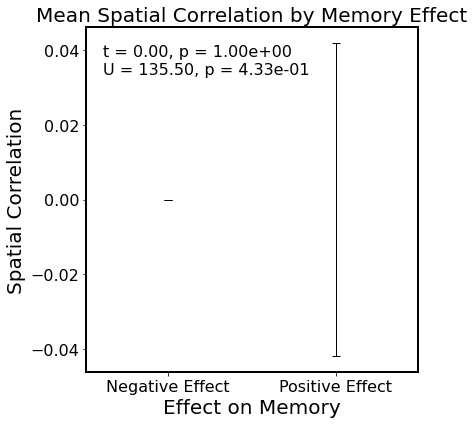

In [24]:
from calvin_utils.statistical_utils.dynamite_plot import DynamitePlotter
plotter = DynamitePlotter()
plotter.plot(
    df=data_df,
    xlabel="Effect on Memory",
    ylabel="Spatial Correlation",
    group_col=x_col,
    y_col=y_col,
    dataset_name='Mean Spatial Correlation by Memory Effect',
    out_dir=out_dir
)